[View in Colaboratory](https://colab.research.google.com/github/moyoyomiyazawa/practice/blob/master/cat_dog.ipynb)

In [3]:
!pip install icrawler

    100% |████████████████████████████████| 5.8MB 6.3MB/s 


In [4]:
from icrawler.builtin import GoogleImageCrawler

# 猫の画像を100枚取得
crawler = GoogleImageCrawler(storage={'root_dir': 'cats'})
crawler.crawl(keyword='猫', max_num=100)

2018-10-23 02:04:59,580 - INFO - icrawler.crawler - start crawling...
2018-10-23 02:04:59,584 - INFO - icrawler.crawler - starting 1 feeder threads...
2018-10-23 02:04:59,589 - INFO - feeder - thread feeder-001 exit
2018-10-23 02:04:59,589 - INFO - icrawler.crawler - starting 1 parser threads...
2018-10-23 02:04:59,594 - INFO - icrawler.crawler - starting 1 downloader threads...
2018-10-23 02:05:00,079 - INFO - parser - parsing result page https://www.google.com/search?q=%E7%8C%AB&ijn=0&start=0&tbs=&tbm=isch
2018-10-23 02:05:00,287 - INFO - downloader - image #1	https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Cat03.jpg/230px-Cat03.jpg
2018-10-23 02:05:01,269 - INFO - downloader - image #2	https://img0.pclady.com.cn/pclady/pet/choice/cat/1701/6.jpg
2018-10-23 02:05:01,324 - INFO - downloader - image #3	https://i.ytimg.com/vi/fhJe4noc5o4/maxresdefault.jpg
2018-10-23 02:05:02,137 - INFO - downloader - image #4	http://n.sinaimg.cn/news/transform/20171113/puY7-fynship2141885.jpg
2

In [5]:
# 犬の画像を100枚取得
crawler = GoogleImageCrawler(storage={'root_dir': 'dogs'})
crawler.crawl(keyword='犬', max_num=100)

2018-10-23 02:12:40,771 - INFO - icrawler.crawler - start crawling...
2018-10-23 02:12:40,773 - INFO - icrawler.crawler - starting 1 feeder threads...
2018-10-23 02:12:40,775 - INFO - feeder - thread feeder-001 exit
2018-10-23 02:12:40,775 - INFO - icrawler.crawler - starting 1 parser threads...
2018-10-23 02:12:40,787 - INFO - icrawler.crawler - starting 1 downloader threads...
2018-10-23 02:12:41,329 - INFO - parser - parsing result page https://www.google.com/search?q=%E7%8A%AC&ijn=0&start=0&tbs=&tbm=isch
2018-10-23 02:12:41,491 - INFO - downloader - image #1	https://www.min-inuzukan.com/images/dog_img_shiba.jpg?180824
2018-10-23 02:12:41,535 - INFO - downloader - image #2	https://www.min-inuzukan.com/images/detailMain_pomeranian.png?20170926
2018-10-23 02:12:41,554 - INFO - downloader - image #3	https://www.min-inuzukan.com/images/dog_img_long-chihuahua.jpg?180824
2018-10-23 02:12:41,664 - INFO - downloader - image #4	https://static.pepy.jp/wp-content/uploads/2017/03/14200700/shutt

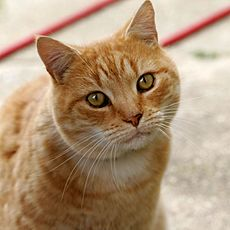

In [6]:
import glob
glob.glob('./images/*')

#猫画像を表示
from IPython.display import Image, display_jpeg
display_jpeg(Image('./cats/000001.jpg'))

In [0]:
# データの整形と学習データの作成

from PIL import Image
import os, glob
import numpy as np
classes = ['dogs', 'cats']
num_classes = len(classes)
image_size = 50
num_testdata = 25

X_train = []
X_test = []
Y_train = []
Y_test = []

for index, classlabel in enumerate(classes):
    photos_dir = './' + classlabel
    files = glob.glob(photos_dir + '/*.jpg')
    for i, file in enumerate(files):
        image = Image.open(file)
        image = image.convert('RGB')
        image = image.resize((image_size, image_size))
        data = np.asarray(image)
        if i < num_testdata:
            X_test.append(data)
            Y_test.append(index)
        else:
            for angle in range(-20, 20, 5):
                
                img_r = image.rotate(angle)
                data = np.asarray(img_r)
                X_train.append(data)
                Y_train.append(index)
                
                img_trans = img_r.transpose(Image.FLIP_LEFT_RIGHT)
                data = np.asarray(img_trans)
                X_train.append(data)
                Y_train.append(index)
                
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(Y_train)
y_test = np.array(Y_test)

xy = (X_train, X_test, y_train, y_test)
np.save('./dog_cat.npy', xy)

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils import np_utils
import keras
import numpy as np

classes = ['dog', 'cat']
num_classes = len(classes)
image_size = 50

"""
データを読み込む関数
"""
def load_data():
    X_train, X_test, y_train, y_test = np.load('./dog_cat.npy')
    # データを正規化
    X_train = X_train.astype('float') / 256
    X_test = X_test.astype('float') / 256
    y_train = np_utils.to_categorical(y_train, num_classes)
    y_test = np_utils.to_categorical(y_test, num_classes)
    
    return X_train, y_train, X_test, y_test

"""
モデルを学習する関数
"""
def train(X, y, X_test, y_test):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=X.shape[1:]))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.1))
    
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.45))
    model.add(Dense(2))
    model.add(Activation('softmax'))
    
    opt = keras.optimizers.rmsprop(lr=0.00005, decay=1e-6)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    model.fit(X, y, batch_size=28, epochs=40)
    model.save('./cnn.h5')
    
    return model

"""
メイン関数
データの読み込みとモデルの学習を行います。
"""
def main():
    # データの読み込み
    X_train, y_train, X_test, y_test = load_data()
    
    # モデルの学習
    model = train(X_train, y_train, X_test, y_test)
    
main()

Using TensorFlow backend.


2018-10-23 03:38:54,052 - WARNING - tensorflow - Variable *= will be deprecated. Use `var.assign(var * other)` if you want assignment to the variable value or `x = x * y` if you want a new python Tensor object.


Epoch 1/40
1184/1184 [==============================] - 2s 2ms/step - loss: 0.5961 - acc: 0.7162
Epoch 2/40
1184/1184 [==============================] - 1s 818us/step - loss: 0.5566 - acc: 0.7179
Epoch 3/40
1184/1184 [==============================] - 1s 823us/step - loss: 0.5336 - acc: 0.7264
Epoch 4/40
1184/1184 [==============================] - 1s 824us/step - loss: 0.5084 - acc: 0.7356
Epoch 5/40
1184/1184 [==============================] - 1s 819us/step - loss: 0.4821 - acc: 0.7593
Epoch 6/40
1184/1184 [==============================] - 1s 824us/step - loss: 0.4436 - acc: 0.7855
Epoch 7/40
1184/1184 [==============================] - 1s 827us/step - loss: 0.4378 - acc: 0.7998
Epoch 8/40
1184/1184 [==============================] - 1s 815us/step - loss: 0.4031 - acc: 0.8209
Epoch 9/40
1184/1184 [==============================] - 1s 820us/step - loss: 0.3697 - acc: 0.8311
Epoch 10/40
1184/1184 [==============================] - 1s 829us/step - loss: 0.3385 - acc: 0.8463
Epoch 11/40

In [20]:
from google.colab import files
uploaded = files.upload()

Saving cat3.jpg to cat3.jpg


In [21]:
import keras
import sys, os
import scipy
import scipy.misc
import numpy as np
from keras.models import load_model

imsize = (50, 50)

testpic = './cat3.jpg'
keras_param = './cnn.h5'

def load_image(path):
    img = scipy.misc.imread(path, mode='RGB')
    img = scipy.misc.imresize(img, imsize)
    img = img / 255.0
    return img

def get_file(dir_path):
    filenames = os.listdir(dir_path)
    return filenames

if __name__=='__main__':
    
    model = load_model('cnn.h5')
    img = load_image(testpic)
    prd = model.predict(np.array([img]))
    print(prd)
    prelabel = np.argmax(prd, axis=1)
    if prelabel == 0:
        print('>>> 犬')
    elif prelabel == 1:
        print('>>> 猫')

[[0.4513728  0.54862726]]
>>> 猫


/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):
